In [8]:

import pandas as pd
import csv
from datasketch import MinHash

#Reading the data from docword.enron.txt file
with open('Input_data/docword.enron.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(" ") for line in stripped if line)
    with open('Input_file.csv', 'w') as out_file:
            writer = csv.writer(out_file)
            writer.writerows(lines)
#Creating the dataframe with all data in datawod.enron.txt            
column_names=['DocId' , 'Word_Id' , 'Word_Count']
input_file = pd.read_csv("Input_file.csv", skiprows=6 , header=None, names=column_names ) 
df = pd.DataFrame(input_file)
df.tail(5)


,DocId,Word_Id,Word_Count
3710415,39861,18448,1
3710416,39861,18848,1
3710417,39861,23449,1
3710418,39861,25721,1
3710419,39861,27196,1


In [5]:
import random
import time
random.seed(127)

#Calculating the similarity of the given document with all the documents
print("::::::::::::::::::::::::: Brute Force Method ::::::::::::::::::::::::::::::::::::::")
docId = int(input("Enter document whose nearest neighbours you want to find :::::::"))
k =int(input("Enter the number of neighbours you want to find :::::::"))
similarity_doc_matrix =pd.DataFrame(index=range(0,3*k), columns=['DocId', 'Distance'])

start_time = time.time()
selected_doc = df.loc[df['DocId'] == docId]

#Selecting 3*k documents randomly out of the 39861 documents and measuring the similarity
for j in range(0, 3*k):
    i = random.randint(0, 39861)
    intersection =0
    if i != docId :
        doc = df.loc[df['DocId'] == i]
        for x in range(0,doc.shape[0]):
            for y in range(0,selected_doc.shape[0]):
                if doc.iloc[x , 1] == selected_doc.iloc[ y, 1]:
                    intersection = intersection +1 
        union = doc.shape[0] + selected_doc.shape[0] - intersection
        similarity_doc_matrix.iloc[j,0] = i
        similarity_doc_matrix.iloc[j,1] = intersection/union

sorted_by_dist = similarity_doc_matrix.sort_values('Distance' , ascending =False)

print("K nearest neighbours for the given document are :::::")
average_similarity = 0
#Find the k nearest neighbours by sorting the similarities of 3*k neighbours and selecting the ones with highest similarity
for i in range(0,k):
    print( i+1 , " DocId :::" , sorted_by_dist.iloc[i,0] , " Similarity :::" , sorted_by_dist.iloc[i,1])
    average_similarity = average_similarity + sorted_by_dist.iloc[i,1]

elapsed_time = time.time() - start_time
average_similarity = average_similarity/ k
print("Running Time in seconds of Brute Force::::: ", elapsed_time)
print("Average similarity of documents using brute force method ::::::", average_similarity)
     

::::::::::::::::::::::::: Brute Force Method ::::::::::::::::::::::::::::::::::::::
Enter document whose nearest neighbours you want to find :::::::67
Enter the number of neighbours you want to find :::::::20
K nearest neighbours for the given document are :::::
1  DocId ::: 9665  Similarity ::: 0.047619047619047616
2  DocId ::: 19259  Similarity ::: 0.04081632653061224
3  DocId ::: 16744  Similarity ::: 0.04
4  DocId ::: 19607  Similarity ::: 0.0392156862745098
5  DocId ::: 1955  Similarity ::: 0.038834951456310676
6  DocId ::: 16468  Similarity ::: 0.02666666666666667
7  DocId ::: 28143  Similarity ::: 0.02654867256637168
8  DocId ::: 16547  Similarity ::: 0.023255813953488372
9  DocId ::: 39779  Similarity ::: 0.022222222222222223
10  DocId ::: 12838  Similarity ::: 0.021739130434782608
11  DocId ::: 14725  Similarity ::: 0.02127659574468085
12  DocId ::: 29227  Similarity ::: 0.02127659574468085
13  DocId ::: 7982  Similarity ::: 0.018018018018018018
14  DocId ::: 4075  Similarity 

In [7]:
#Calculating the similairy between the selected document and other documents using LSH from Datasketch library
from datasketch import MinHash, MinHashLSH
import random
import time
random.seed(376)
print("::::::::::::::::::::::::: LSH Method ::::::::::::::::::::::::::::::::::::::")

b =int(input("Enter the number of bands you want :::::::"))
r =int(input("Enter the number of rows per bands you want :::::::")) 
perms =int(input("Enter the number of rows of signature matrix you want :::::::"))
n = int(input("Enter the dataset size you want :::::::"))
docId = int(input("Enter document whose nearest neighbours you want to find :::::::"))
keys = [None]* n
start_time = time.time()

selected_doc = df.loc[df['DocId'] == docId]

m1 = MinHash(num_perm=perms)
set1 = set(selected_doc["Word_Id"].tolist())

m2 = {}
lsh = MinHashLSH(params=[b, r], num_perm=perms)
for d in set1:
    m1.update(str(d).encode('utf8'))
for j in range(0, 200):
    i = random.randint(0, 39861)
    if i in keys:
        print("Skipping duplicate doc")
    else: 
        keys.append(i)
        if i != docId :
            doc = df.loc[df['DocId'] == i]
            m2[j] = MinHash(num_perm=perms)
            set2 = set(doc["Word_Id"].tolist())

            for d in set2:
                m2[j].update(str(d).encode("utf-8"))
            lsh.insert(i, m2[j])


result = lsh.query(m1)
print("Approximate neighbours are", result)

elapsed_time = time.time() - start_time
average_similarity = (1/b)**(1/r)

print("\n\nRunning Time in seconds of LSH::::: ", elapsed_time)
print("Average similarity of documents using LSH Method ::::::", average_similarity)

::::::::::::::::::::::::: LSH Method ::::::::::::::::::::::::::::::::::::::
Enter the number of bands you want :::::::30
Enter the number of rows per bands you want :::::::1
Enter the number of rows of signature matrix you want :::::::256
Enter the dataset size you want :::::::200
Enter document whose nearest neighbours you want to find :::::::23
Approximate neighbours are [10753, 5633, 12675, 9732, 38152, 37514, 39434, 33661, 33807, 10256, 26640, 39187, 21398, 21016, 21913, 5916, 5926, 14204, 15403, 33197, 19502, 4660, 29108, 14390, 11191, 693, 25274, 7359, 11972, 24644, 25414, 33224, 13002, 24267, 25295, 11261, 34645, 25045, 869, 12776, 5609, 15212, 23022, 32367, 17519, 23667, 32116, 18037, 36086, 24956, 7165]


Running Time in seconds of LSH:::::  3.615689754486084
Average similarity of documents using LSH Method :::::: 0.03333333333333333


::::::::::::::::::::::: Demonstrating the effect of varying number of bands ::::::::::::::::::::::::::::::::::::
Keep the following values constant 
1.r =2 
2.Number of permutations = 256 .Data Size = 100 
Enter document whose similarity with others is to be found :::::::567
Approximate neighbours are [4576, 10459]
Skipping duplicate doc
Skipping duplicate doc
Approximate neighbours are [25556, 33764]
Skipping duplicate doc
Approximate neighbours are [11585, 803, 38566]
Skipping duplicate doc
Approximate neighbours are [6256, 6051, 6549]
Number of neighbours :::: [2, 2, 3, 3]
Average Similarity :::: [0.18257418583505536, 0.12909944487358055, 0.1, 0.09128709291752768]
Running Time :::: [2.040860414505005, 1.7707264423370361, 1.934272289276123, 1.9010403156280518]


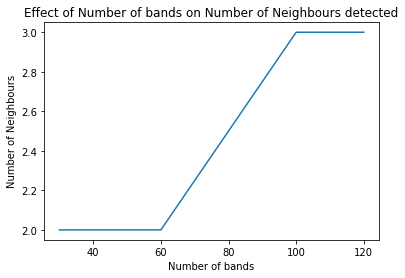

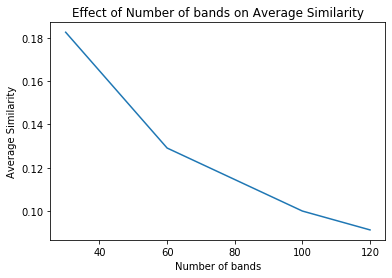

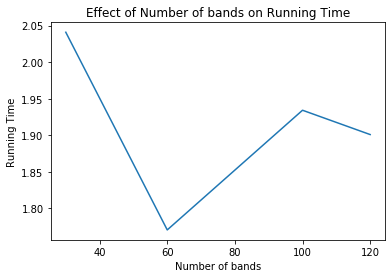

In [79]:
import matplotlib.pyplot as plt
random.seed(40)

#Calculating the similairy between the selected document and other documents using LSH from Datasketch library
print("::::::::::::::::::::::: Demonstrating the effect of varying number of bands ::::::::::::::::::::::::::::::::::::")
print("Keep the following values constant \n1.r =2 \n2.Number of permutations = 256 \n3.Data Size = 100 ",)
docId = int(input("Enter document whose similarity with others is to be found :::::::"))

#For varying number of bands we see the effects on number of neighbours detected, avg similarity and running time by keeping everything else constant
r =2
perms = 256
n = 100
b =[30, 60, 100, 120]
number_of_neighbours = [None] * 4
avg_similarity = [None] * 4
running_time = [None] * 4
keys = [None]* n


m1 = MinHash(num_perm=perms)
for x in range(0,4):
    start_time = time.time()
    lsh = MinHashLSH(params=[b[x], r], num_perm=perms)
    for d in set1:
        m1.update(str(d).encode('utf8'))
    for j in range(0, n):
        i = random.randint(0, 39861) 
        if i in keys:
            print("Skipping duplicate doc")
        else: 
            keys.append(i)
            if i != docId:
                doc = df.loc[df['DocId'] == i]
                m2[j] = MinHash(num_perm=perms)
                set2 = set(doc["Word_Id"].tolist())

                for d in set2:
                    m2[j].update(str(d).encode("utf-8"))
                lsh.insert(i, m2[j])

    result = lsh.query(m1)
    print("Approximate neighbours are", result)
    number_of_neighbours[x] = len(result)
    avg_similarity[x] = (1/b[x])**(1/r)
    running_time[x] = time.time() - start_time
    
print( "Number of neighbours ::::" , number_of_neighbours)
print( "Average Similarity ::::" , avg_similarity)
print( "Running Time ::::" , running_time)

plt.plot(b, number_of_neighbours )
plt.xlabel('Number of bands')
plt.ylabel('Number of Neighbours')
plt.title('Effect of Number of bands on Number of Neighbours detected')
plt.show()

plt.plot(b, avg_similarity )
plt.xlabel('Number of bands')
plt.ylabel('Average Similarity')
plt.title('Effect of Number of bands on Average Similarity')
plt.show()

plt.plot(b, running_time )
plt.xlabel('Number of bands')
plt.ylabel('Running Time')
plt.title('Effect of Number of bands on Running Time')
plt.show()
    

::::::::::::::::::::: Demonstrating the effect of varying number of rows per band :::::::::::::::::::::::::::::::::
Keep the following values constant 
1.b =30 
2.Number of permutations = 256 
3.Data Size = 100 
Enter document whose similarity with others is to be found :::::::567
Approximate neighbours are [4576, 14881, 27401, 20233, 38411, 15787, 39794, 38484, 15481, 6394, 10459]
Skipping duplicate doc
Skipping duplicate doc
Approximate neighbours are [25556, 33764]
Skipping duplicate doc
Approximate neighbours are []
Skipping duplicate doc
Approximate neighbours are []
Number of neighbours :::: [11, 2, 0, 0]
Average Similarity :::: [0.03333333333333333, 0.18257418583505536, 0.42728700639623407, 0.5673004449747446]
Running Time :::: [2.0695042610168457, 1.7636134624481201, 1.8047699928283691, 1.8361809253692627]


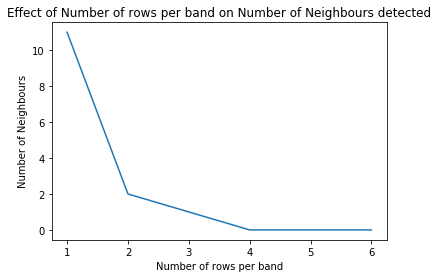

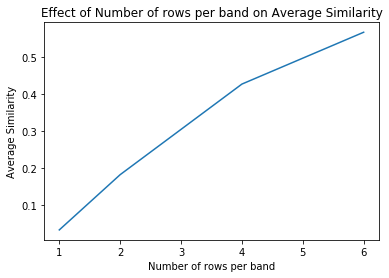

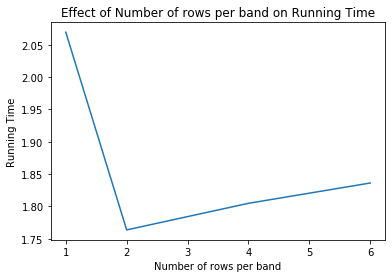

In [80]:
import matplotlib.pyplot as plt
random.seed(403)

print("::::::::::::::::::::: Demonstrating the effect of varying number of rows per band :::::::::::::::::::::::::::::::::")
print("Keep the following values constant \n1.b =30 \n2.Number of permutations = 256 \n3.Data Size = 100 ",)
docId = int(input("Enter document whose similarity with others is to be found :::::::"))
r =[1,2,4, 6] 
perms = 256
n = 100
b = 30
number_of_neighbours = [None] * 4
avg_similarity = [None] * 4
running_time = [None] * 4
keys = [None]* n

m1 = MinHash(num_perm=perms)
for x in range(0,4):
    start_time = time.time()
    lsh = MinHashLSH(params=[b, r[x]], num_perm=perms)
    for d in set1:
        m1.update(str(d).encode('utf8'))
    for j in range(0, n):
        i = random.randint(0, 39861) 
        if i in keys :
            print("Skipping duplicate doc")
        else: 
            keys.append(i)
            if i != docId:
                doc = df.loc[df['DocId'] == i]
                m2[j] = MinHash(num_perm=perms)
                set2 = set(doc["Word_Id"].tolist())

                for d in set2:
                    m2[j].update(str(d).encode("utf-8"))
                lsh.insert(i, m2[j])

    result = lsh.query(m1)
    print("Approximate neighbours are", result)
    number_of_neighbours[x] = len(result)
    avg_similarity[x] = (1/b)**(1/r[x])
    running_time[x] = time.time() - start_time
    
print( "Number of neighbours ::::" , number_of_neighbours)
print( "Average Similarity ::::" , avg_similarity)
print( "Running Time ::::" , running_time)

plt.plot(r, number_of_neighbours )
plt.xlabel('Number of rows per band')
plt.ylabel('Number of Neighbours')
plt.title('Effect of Number of rows per band on Number of Neighbours detected')
plt.show()

plt.plot(r, avg_similarity )
plt.xlabel('Number of rows per band')
plt.ylabel('Average Similarity')
plt.title('Effect of Number of rows per band on Average Similarity')
plt.show()

plt.plot(r, running_time )
plt.xlabel('Number of rows per band')
plt.ylabel('Running Time')
plt.title('Effect of Number of rows per band on Running Time')
plt.show()

::::::::::::::::::::: Demonstrating the effect of varying data size :::::::::::::::::::::::::::::::::
Keep the following values constant 
1.b =30 
2.Number of permutations = 256 
3.r = 2 
Enter document whose similarity with others is to be found :::::::567
Approximate neighbours are [4576, 10459]
Skipping duplicate doc
Skipping duplicate doc
Approximate neighbours are [11585, 803, 25556, 33764]
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Approximate neighbours are [21032, 6549]
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Approximate neighbours are [22660, 1654]
Number of neighbours :::: [2, 4, 2, 2]
Average Similarity :::: [0.1414213562373095, 0.1414213562373095, 0.1414213562373095, 0.1414213562373095]
Running Time :::: [2.0554211139678955, 3.6985690593719482, 5.74309515953064,

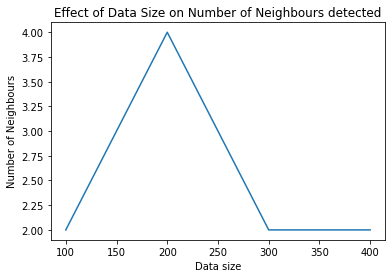

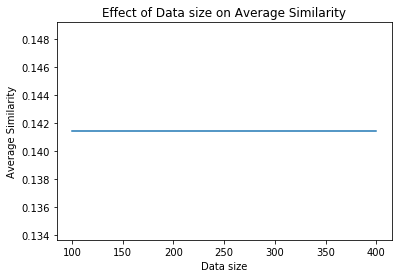

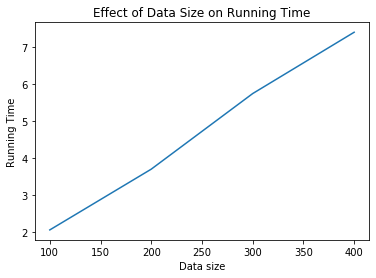

In [81]:
import matplotlib.pyplot as plt
random.seed(740)

print("::::::::::::::::::::: Demonstrating the effect of varying data size :::::::::::::::::::::::::::::::::")
print("Keep the following values constant \n1.b =30 \n2.Number of permutations = 256 \n3.r = 2 ",)
docId = int(input("Enter document whose similarity with others is to be found :::::::"))
r =2
perms = 256
n = [ 100 , 200 , 300, 400]
b = 50
number_of_neighbours = [None] * 4
avg_similarity = [None] * 4
running_time = [None] * 4
keys = [None]* i
m1 = MinHash(num_perm=perms)
for x in range(0,4):
    start_time = time.time()
    lsh = MinHashLSH(params=[b, r], num_perm=perms)
    for d in set1:
        m1.update(str(d).encode('utf8'))
    for j in range(0, n[x]):
        i = random.randint(0, 39861) 
        if i in keys :
            print("Skipping duplicate doc")
        else: 
            keys.append(i)
            if i != docId:
                doc = df.loc[df['DocId'] == i]
                m2[j] = MinHash(num_perm=perms)
                set2 = set(doc["Word_Id"].tolist())

                for d in set2:
                    m2[j].update(str(d).encode("utf-8"))
                lsh.insert(i, m2[j])

    result = lsh.query(m1)
    print("Approximate neighbours are", result)
    number_of_neighbours[x] = len(result)
    avg_similarity[x] = (1/b)**(1/r)
    running_time[x] = time.time() - start_time
    
print( "Number of neighbours ::::" , number_of_neighbours)
print( "Average Similarity ::::" , avg_similarity)
print( "Running Time ::::" , running_time)

plt.plot(n, number_of_neighbours )
plt.xlabel('Data size')
plt.ylabel('Number of Neighbours')
plt.title('Effect of Data Size on Number of Neighbours detected')
plt.show()

plt.plot(n, avg_similarity )
plt.xlabel('Data size')
plt.ylabel('Average Similarity')
plt.title('Effect of Data size on Average Similarity')
plt.show()

plt.plot(n, running_time )
plt.xlabel('Data size')
plt.ylabel('Running Time')
plt.title('Effect of Data Size on Running Time')
plt.show()

::::::::::::::: Demonstrating the effect of varying number of rows of signature matrix ::::::::::::::::::
Keep the following values constant 
1.b =30 
2.r = 2 
3.Data Size = 400
Enter document whose similarity with others is to be found :::::::567
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Approximate neighbours are [4228, 14996, 26773, 18167, 20959]
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Approximate neighbours are [21995, 36334, 19278, 26482, 32115, 14035, 16085, 11709]
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping duplicate doc
Skipping

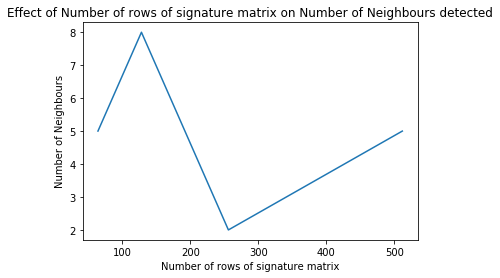

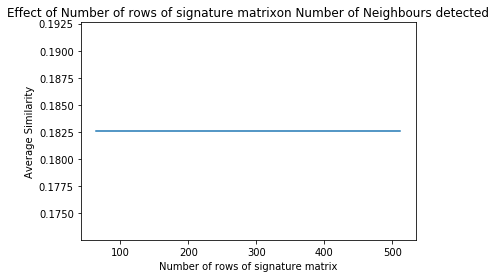

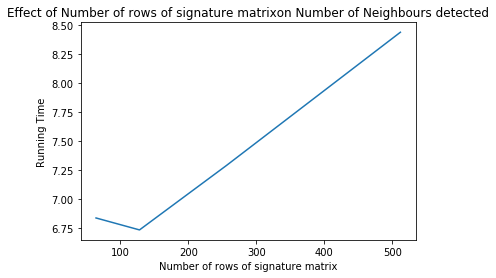

In [82]:
import matplotlib.pyplot as plt
random.seed(423)
print("::::::::::::::: Demonstrating the effect of varying number of rows of signature matrix ::::::::::::::::::")
print("Keep the following values constant \n1.b =30 \n2.r = 2 \n3.Data Size = 400",)
docId = int(input("Enter document whose similarity with others is to be found :::::::"))
r =2
perms = [64, 128, 256, 512]
n = 400
b = 30
number_of_neighbours = [None] * 4
avg_similarity = [None] * 4
running_time = [None] * 4
keys = [None]* n

for x in range(0,4):
    m1 = MinHash(num_perm=perms[x])
    start_time = time.time()
    lsh = MinHashLSH(params=[b, r], num_perm=perms[x])
    for d in set1:
        m1.update(str(d).encode('utf8'))
    for j in range(0, n):
        i = random.randint(0, 39861) 
        if i in keys :
            print("Skipping duplicate doc")
        else: 
            keys.append(i)
            if i != docId:
                doc = df.loc[df['DocId'] == i]
                m2[j] = MinHash(num_perm=perms[x])
                set2 = set(doc["Word_Id"].tolist())

                for d in set2:
                    m2[j].update(str(d).encode("utf-8"))
                lsh.insert(i, m2[j])

    result = lsh.query(m1)
    print("Approximate neighbours are", result)
    number_of_neighbours[x] = len(result)
    avg_similarity[x] = (1/b)**(1/r)
    running_time[x] = time.time() - start_time
    
print( "Number of neighbours ::::" , number_of_neighbours)
print( "Average Similarity ::::" , avg_similarity)
print( "Running Time ::::" , running_time)

plt.plot(perms, number_of_neighbours )
plt.xlabel('Number of rows of signature matrix')
plt.ylabel('Number of Neighbours')
plt.title('Effect of Number of rows of signature matrix on Number of Neighbours detected')
plt.show()

plt.plot(perms, avg_similarity )
plt.xlabel('Number of rows of signature matrix')
plt.ylabel('Average Similarity')
plt.title('Effect of Number of rows of signature matrixon Number of Neighbours detected')
plt.show()

plt.plot(perms, running_time )
plt.xlabel('Number of rows of signature matrix')
plt.ylabel('Running Time')
plt.title('Effect of Number of rows of signature matrixon Number of Neighbours detected')
plt.show()